In [4]:

# Dataset
time_data = [
(3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
(4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
(5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
(3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
(4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

# Task 1: Classify Study Time
low = []        # less than 3 hours
moderate = []   # between 3 and 5 hours (inclusive of 3 and 5)
high = []       # more than 5 hours

for study, ent, sleep in time_data:
    if study < 3:
        low.append(study)
    elif 3 <= study <= 5:
        moderate.append(study)
    else:
        high.append(study)

print("Low study hours (<3):", low)
print("Moderate study hours (3-5):", moderate)
print("High study hours (>5):", high)


Low study hours (<3): [2.5, 1.5, 2.0, 2.5]
Moderate study hours (3-5): [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study hours (>5): [5.5, 6.0]


In [5]:
# Task 2: Counts
print("\nCounts:")
print("Days with low study time:", len(low))
print("Days with moderate study time:", len(moderate))
print("Days with high study time:", len(high))




Counts:
Days with low study time: 4
Days with moderate study time: 9
Days with high study time: 2


In [6]:

# Task 3: Convert study hours to minutes
study_minutes = [s * 60 for s, _, _ in time_data]
print("\nStudy hours converted to minutes:")
print(study_minutes)



Study hours converted to minutes:
[210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


In [7]:

# Task 4 : Analyze Average Time Use

study_hours = [s for s, _, _ in time_data]
ent_hours = [e for _, e, _ in time_data]
sleep_hours = [sl for _, _, sl in time_data]

avg_study = sum(study_hours) / len(study_hours)
avg_ent = sum(ent_hours) / len(ent_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print("\nAverage hours spent studying: {:.2f}".format(avg_study))
print("Average hours spent on entertainment: {:.2f}".format(avg_ent))
print("Average hours spent sleeping: {:.2f}".format(avg_sleep))



Average hours spent studying: 3.70
Average hours spent on entertainment: 2.50
Average hours spent sleeping: 7.17


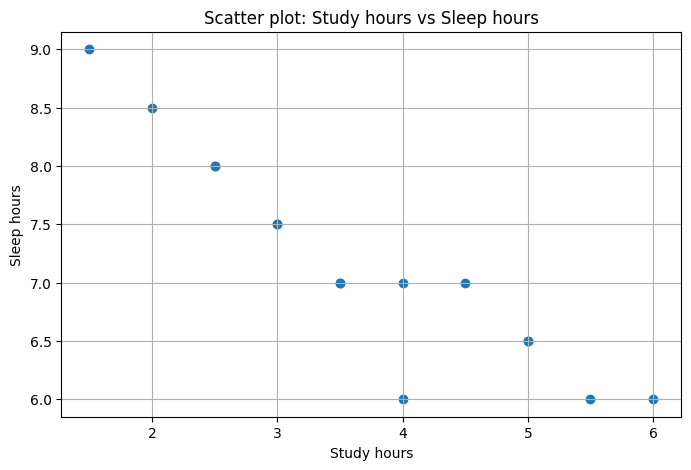

In [9]:
# Task 5 : Data for the scatter plot

import matplotlib.pyplot as plt

study_hours = [s for s, _, _ in time_data]
sleep_hours = [sl for _, _, sl in time_data]

plt.figure(figsize=(8,5))
plt.scatter(study_hours, sleep_hours)
plt.xlabel("Study hours")
plt.ylabel("Sleep hours")
plt.title("Scatter plot: Study hours vs Sleep hours")
plt.grid(True)
plt.show()

In [10]:
# 8.1
# Task 1 - Sum of Nested Lists
def sum_nested_list(nested_list):
    total = 0
    for element in nested_list:
        if isinstance(element, list):
            total += sum_nested_list(element)
        else:
            total += element
    return total

# Test
nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
print("Sum of", nested_list, "=", sum_nested_list(nested_list))


Sum of [1, [2, [3, 4], 5], 6, [7, 8]] = 36


In [11]:
# Task 2 - Generate All Permutations of a String (unique permutations)
def generate_permutations(s):
    results = []
    s_list = list(s)
    s_list.sort()

    def backtrack(path, remaining):
        if not remaining:
            results.append(''.join(path))
            return
        prev = None
        for i in range(len(remaining)):
            if prev is not None and remaining[i] == prev:
                continue
            prev = remaining[i]
            ch = remaining[i]
            new_rem = remaining[:i] + remaining[i+1:]
            backtrack(path + [ch], new_rem)

    backtrack([], s_list)
    return results

print("\nPermutations of 'abc':", generate_permutations("abc"))
print("Permutations of 'aab':", generate_permutations("aab"))


Permutations of 'abc': ['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
Permutations of 'aab': ['aab', 'aba', 'baa']


In [12]:
# Task 3 - Directory Size Calculation (recursive)
directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}

def calculate_directory_size(directory):
    total = 0
    for name, value in directory.items():
        if isinstance(value, dict):
            total += calculate_directory_size(value)
        else:
            total += value
    return total

print("\nTotal directory size (KB):", calculate_directory_size(directory_structure))



Total directory size (KB): 1400


In [13]:
# 8.2
# Task 1 - Coin Change Problem (tabulation)
def min_coins(coins, amount):
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0
    for coin in coins:
        for i in range(coin, amount + 1):
            if dp[i - coin] + 1 < dp[i]:
                dp[i] = dp[i - coin] + 1
    return dp[amount] if dp[amount] != float('inf') else -1

print("min_coins([1,2,5], 11) =", min_coins([1,2,5], 11))
print("min_coins([2], 3) =", min_coins([2], 3))


min_coins([1,2,5], 11) = 3
min_coins([2], 3) = -1


In [14]:
# Task 2 - Longest Common Subsequence (LCS) length
def longest_common_subsequence(s1, s2):
    n, m = len(s1), len(s2)
    dp = [[0]*(m+1) for _ in range(n+1)]
    for i in range(1, n+1):
        for j in range(1, m+1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    return dp[n][m]

print("\nLCS length of 'abcde' and 'ace' =", longest_common_subsequence("abcde", "ace"))



LCS length of 'abcde' and 'ace' = 3


In [15]:
# Task 3 - 0/1 Knapsack Problem (DP)
def knapsack(weights, values, capacity):
    n = len(weights)
    dp = [[0]*(capacity + 1) for _ in range(n+1)]
    for i in range(1, n+1):
        w = weights[i-1]
        v = values[i-1]
        for cap in range(capacity + 1):
            dp[i][cap] = dp[i-1][cap]
            if w <= cap:
                candidate = dp[i-1][cap - w] + v
                if candidate > dp[i][cap]:
                    dp[i][cap] = candidate
    return dp[n][capacity]

weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7
print("\nKnapsack result (expected 9):", knapsack(weights, values, capacity))



Knapsack result (expected 9): 9
